Video: https://www.youtube.com/watch?v=_T0l015ecK4&t=555s

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [38]:
# stock market time series Petrobras 
prices = web.DataReader('PETR4.SA', data_source='yahoo', start='2002-01-01', end='2022-10-02')['Close']
returns = prices.pct_change()

last_price = prices[-1]

In [39]:
n_simulation = 10
n_days = 252 # working days in a year


df_simulation = pd.DataFrame()

for x in range(n_simulation):
    count = 0
    daily_stdev = returns.std() # volatility
    
    price_series = []
    
    # Preço de hoje = preço de ontem * e^r (sendo r taxa de retorno logaritmico da ação)
    # Drift: direção que as taxas de retorno tiveram no passado. Media - 0.5*variancia^2 
    # Volatilidade: variável aleatória. Distribuição normal 
    # Retorno simulado baseado na volatilidade. r = drift + volatilidade
    # valor atual = valor anterior * exponencial de r

    price = last_price * (1 +np.random.normal(0, daily_stdev))
    price_series.append(price)

    for y in range(n_days):
        if count == 251:
            break
        price = price_series[count] *(1 + np.random.normal(0, daily_stdev))
        price_series.append(price)
        count += 1
    
    df_simulation[x] = price_series

<Figure size 640x480 with 0 Axes>

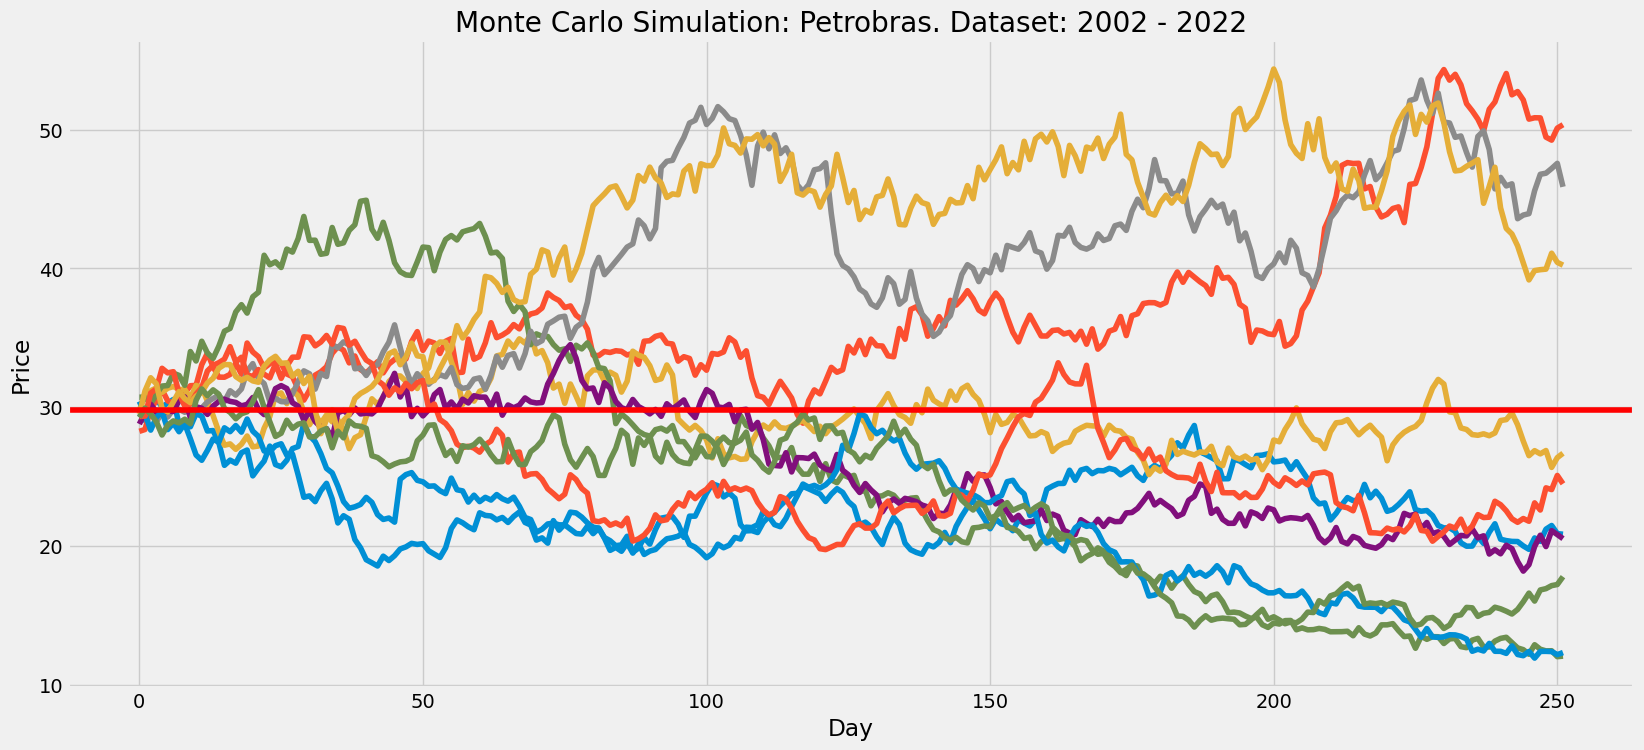

In [40]:
fig = plt.figure()
plt.figure(figsize=(18,8))
plt.title('Monte Carlo Simulation: Petrobras. Dataset: 2002 - 2022')
plt.plot(df_simulation)
plt.axhline(y = last_price, color='r', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()